## Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [84]:
from functools import partial

def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    if type(array) != list:
        raise TypeError("parameter array should be a list")
    if type(element) != int:
        raise TypeError("parameter element must be an integer")
    i = 0
    to_delete_count = 0
    while i + to_delete_count < len(array):
        if array[i + to_delete_count] == element:
            to_delete_count += 1
            while i + to_delete_count < len(array):
                if array[i + to_delete_count] != element:
                    array[i + to_delete_count], array[i] = array[i], array[i + to_delete_count]
                    i += 1
                else:
                    break
        else:
            i += 1
    
    return array[:len(array) - to_delete_count]
            
    
delete_zeros_from_array = partial(delete_elements_from_array, element=0)

In [87]:
ELEMENT_DEL = 0
REPEAT_NUM = 5
DEL_FRACTION = 0.35

from random import choices, shuffle
import time

def generate_array_for_delete(element_to_delete, length, element_min=0, element_max=5):
    """
        This function generates random array where number of elements that would be deleted 
        is approximately 35% of the total number of elements in the array. 
        
        :param element_to_delete: Element that would be deleted from array
        :type element_to_delete: int
        :param length: Total number of elements in array 
        :type length: int
        :param element_min: the value of min element of array (exclude element_to_delete) 
        :type element_min: int
        :param element_max: the value of max element of array (exclude element_to_delete) 
        :type element_max: int
        
        :returns: generated array
        :rtype: list
    """
    for param_name, param in zip(['element_to_delete', 'length', 'element_min', 'element_max'],
                                 [element_to_delete, length, element_min, element_max]):
        if type(param) != int:
            raise TypeError("parameter {} must be of type int".format(param_name))
        
    others = [element for element in range(element_min, element_max+1) if element != element_to_delete]
    n_delete_elements = round(length*DEL_FRACTION)
    array = choices(others, k=length-n_delete_elements)+[element_to_delete]*n_delete_elements
    return array

logs = {'n': [], 'time': []}
for length in range(10000, 1000000, 10000):
    array = generate_array_for_delete(ELEMENT_DEL, length)
    t = []
    for _ in range(REPEAT_NUM):
        shuffle(array)
        start = time.time()
        cleaned_array = delete_zeros_from_array(array)
        t.append(time.time()-start)
    logs['time'].append(sum(t)/REPEAT_NUM)    
    logs['n'].append(length)


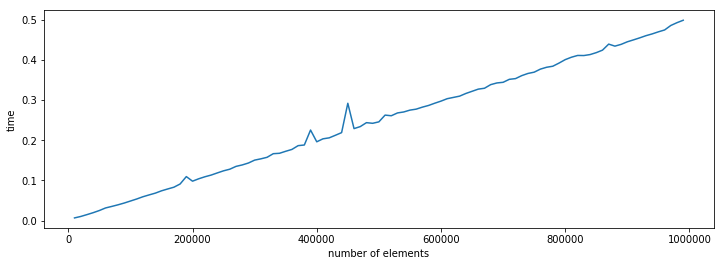

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(logs['n'], logs['time'])
plt.xlabel('number of elements')
plt.ylabel('time');

## Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [74]:
MAX_NUMBERS_COUNT = 3

class InputError(Exception):
    def __init__(self, message):
        self.message = "InputError: {}".format(message)

def convert_to_complex(num):
    """
        This function check if num is of type complex and if not tries to convert it to this type.
        
        :param num: Complex number
        :type element_to_delete: complex, int, tuple of length 2
        
        :returns: converted num
        :rtype: complex
    """    
    if type(num) == tuple and len(num) == 2:
        num = complex(num[0], num[1])
    elif type(num) == int:
        num = complex(num, 0)
    elif type(num) != complex:
        raise TypeError("number should be of type Complex, int or tuple of length 2")
    return num
    
        
def min_complex_num(*args):
    """
        This function finds the minimal complex number (in absolute value) among input numbers.
        Max number of input numbers should be equal to MAX_NUMBERS_COUNT.
        
        :param args: MAX_NUMBERS_COUNT of complex numbers
        :type args: complex, int, tuple of length 2
        
        :returns: minimal complex number among input numbers
        :rtype: complex
    """

    if len(args) > MAX_NUMBERS_COUNT:
        raise InputError("too much numbers. {} complex numbers are required".format(MAX_NUMBERS_COUNT))
    elif len(args) < MAX_NUMBERS_COUNT:
        raise InputError("not enought numbers. {} complex numbers are required".format(MAX_NUMBERS_COUNT))

    minimal = convert_to_complex(args[0])            
    for i in range(1, MAX_NUMBERS_COUNT):
        num = convert_to_complex(args[i])
        if abs(num) < abs(minimal):
            minimal = num

    return minimal


In [75]:
min_complex_num(complex(7,2), (6,-1), 9)

(6-1j)

## Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [81]:
CACHE_MAXSIZE = 512
NUM_PARTS = 4

import re
import numpy as np
from itertools import permutations
from functools import lru_cache

class InputError(Exception):
    def __init__(self, message):
        self.message = "InputError: {}".format(message)

        
def gcd(num1, num2):
    """
        This function finds the greatest common divisor of num1 and num2.
        
        :param num1: 1st number
        :param num2: 2nd number
        :type num1, num2: int
        
        :returns: GCD
        :rtype: int
    """
    if type(num1) != int or type(num2) != int:
        raise TypeError("numbers should be of type int")
    if num2 > num1:
        num1, num2 = num2, num1
    while num2 != 0:
        num1, num2 = num2, num1 % num2
    return num1

@lru_cache(maxsize=CACHE_MAXSIZE)
def fib(n):
    """
        This function generates the n-th Fibonacci number.
        
        :param n: sequence number
        :type n: int
        
        :returns: n-th Fibonacci number
        :rtype: int
    """
    if (n < 0) or type(n) != int:
        raise ValueError("sequence number must be positive integer")
    elif (n == 0) or (n == 1):
        fibn = n
    else:
        fib1 = 0
        fib2 = 1
        i = 2
        for i in range(2, n+1):
            fibn = fib1 + fib2
            fib1, fib2 = fib2, fibn
    return fibn


def median_gcd_for_cardnumber(card_number, password):
    """
        This function:
            - divides card_number into NUM_PARTS equal parts;
            - generates NUM_PARTS Fibonacci numbers, which sequence numbers are equal to parts of card_number;
            - generates permutations of found Fibonacci numbers and concats them;
            - finds the median of greatest common divisors of generated concatenated numbers and password.
        
        :param card_number: the number of bank's card (number should be dividable into NUM_PARTS equal parts)
        :type card_number: str of numbers
        :param password: -
        :type password: str of numbers
        
        :returns: median
        :rtype: int
    """    
    for param_name, param in zip(['card_number', 'password'], [card_number, password]):
        if type(param) != str:
            raise TypeError("expected string type for parameter {}".format(param_name))
        
    card_number = re.sub(r"\D", "", card_number)
    password = int(re.sub(r"\D", "", password))
    
    if len(card_number) % NUM_PARTS == 0:
        step = len(card_number) // NUM_PARTS
        numbers = [fib(int(card_number[i:i+step])) 
                   for i in range(0, len(card_number), step)]
        permuts = [int(''.join([str(p) for p in perm]))
                   for perm in permutations(numbers)]
        gcds = [gcd(num, password) for num in permuts]
        median = sorted(gcds)[len(gcds) // 2]
    else:
        raise ValueError("card number must divide into {} equal parts".format(NUM_PARTS))
    return median


In [82]:
card_number = "1002 7685 0039 9125"
median_gcd_for_cardnumber(card_number, '1625')

5

## Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

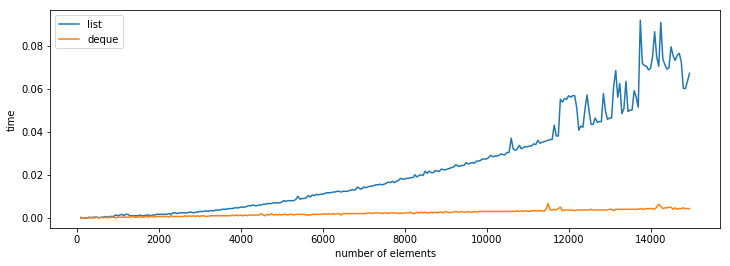

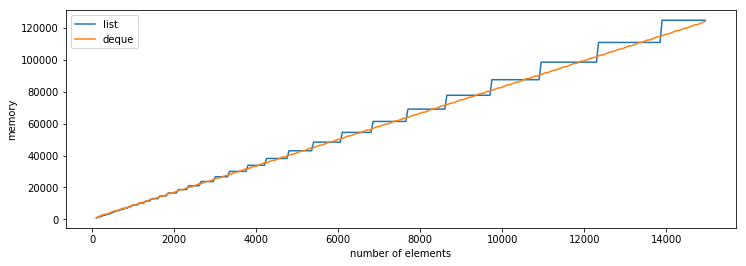

In [60]:
EXPERIMENT_NUM = 3
SIZES = range(100, 10000, 50)
MAX_ELEMENT = 5

from collections import deque
import time
import sys
import matplotlib.pyplot as plt
%matplotlib inline

class TimeMemoryExperiment:
    def __init__(self, structure):
        self.structure = structure
        self.logs = {'time': [], 'memory': []}
        
    def run_experiment(self, experiment_num, sizes):
        for size in sizes:
            experiments = []
            for _ in range(experiment_num):
                struct = self.structure()
                start = time.time()
                for i in range(size):
                    middle = i // 2
                    struct.insert(i % MAX_ELEMENT, middle)
                experiments.append(time.time()- start)
            self.logs['time'].append(sum(experiments) / experiment_num)
            self.logs['memory'].append(sys.getsizeof(struct))


list_experiment = TimeMemoryExperiment(list)
list_experiment.run_experiment(EXPERIMENT_NUM, SIZES)
deque_experiment = TimeMemoryExperiment(deque)
deque_experiment.run_experiment(EXPERIMENT_NUM, SIZES)

for param in list_experiment.logs.keys():
    plt.figure(figsize=(12,4))
    plt.plot(SIZES, list_experiment.logs[param], label='list')
    plt.plot(SIZES, deque_experiment.logs[param], label='deque')
    plt.xlabel('number of elements')
    plt.ylabel(param);
    plt.legend();


## Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [4]:
from itertools import permutations

def get_permutations_check_input(sequence, size=None):
    """
        This function checks input variables and calls get_permutations 
        to generate all permutations of length size from the elements 
        of the sequence.
        
        :param sequence: elements to permute
        :type sequence: iterable
        :param size (optional): size of the permutation
        :type size: int
        
        :returns: permutations
        :rtype: list
    """
    if size is None:
        size = len(sequence)
    if size > len(sequence):
        raise ValueError("parameter size should be less or equal to sequence length")
    if type(size) != int or size <= 0:
        raise TypeError("parameter size should be positive integer")
    if type(sequence) != list:
        try:
            sequence = list(sequence)
        except ValueError:
            print("sequence should be iterable")
    return get_permutations(sequence, size)


def get_permutations(sequence, size):
    """
        This function generates all permutations of length size
        from the elements of the sequence.
        
        :param sequence: elements to permute
        :type sequence: list
        :param size: size of the permutation
        :type size: int
        
        :returns: permutations
        :rtype: list
    """        
    permuts = []
    for i in range(len(sequence)):  
        if size == 1:
            permuts.append([sequence[i]]) 
        else:
            for perm in get_permutations(sequence[:i]+sequence[i+1:], size-1):
                permuts.append([sequence[i]] + perm)
    return permuts


def std_permutations(*args):
    return [_ for _ in permutations(*args)]

In [5]:
SEQ_LENS = range(5, 11)

import time
import string
from random import choices

logs = {'custom': [], 'std': []}
for len_seq in SEQ_LENS:
    start = time.time()
    perm = get_permutations_check_input(range(len_seq))
    logs['custom'].append(time.time()-start)
    
    start = time.time()
    perm = std_permutations(range(len_seq))
    logs['std'].append(time.time()-start)

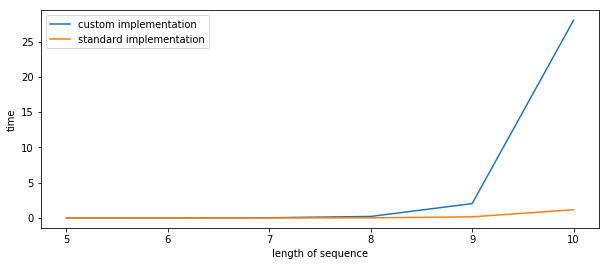

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,4))
plt.plot(SEQ_LENS, logs['custom'], label='custom implementation')
plt.plot(SEQ_LENS, logs['std'], label='standard implementation')
plt.xlabel('length of sequence')
plt.ylabel('time')
plt.legend();